## 다중 클래스 vs 다중 레이블
- 다중클래스 : 중복 선택 불가능, 2개 이상의 클래스
- 다중레이블 : 중복 선택 가능

## One-vs-All , One-vs-One
- One-vs-All : (=One-vs-Rest) m개의 클래스가 존재, 각 클래스마다 분류기 존재, 소프트맥스 분류
--> 하나와 나머지 전부를 비교
- One-vs-One : (m(m-1))/2 개의 분류기 생성
--> 하나와 하나씩 모두 비교

### 소프트맥스 함수 
- 이진분류기 m개 생성 후, 가장 높은 확률이 나오는 클래스 선택
(분류기 번호 hm(x;theta)
- 클래스들의 발생확률을 1로 정규화

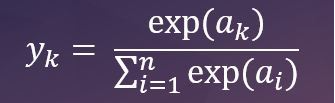

In [2]:
import numpy as np

def softmax(values):
  array_values = np.exp(values)
  return array_values / np.sum(array_values)

values = [2,1,5,0.5]
y = softmax(values)
y.sum()

1.0

In [3]:
y

array([0.04613281, 0.01697131, 0.92660226, 0.01029362])

### mnist 데이터 셋
- 이미지를 일종의 점 dot 으로 생각
- m X n 만큼의 공간에서 색이 진할수록 높은 값, 색이 연할수록 낮은 값

In [4]:
from sklearn import datasets

digit_dataset = datasets.load_digits()
digit_dataset.keys() 
# data : 기본적인 데이터값
# target : y 값
# DESCR : 데이터에 대한 자세한 설명

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
# 8 X 8 공간으로 구성된 1797개의 이미지가 있음
digit_dataset['images'].shape

(1797, 8, 8)

In [6]:
digit_dataset['target'][0]

0

In [7]:
digit_dataset['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

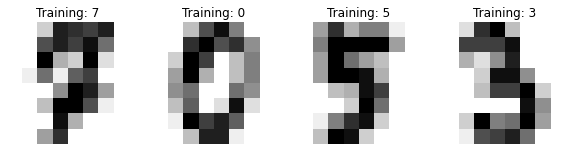

In [8]:
import matplotlib.pyplot as plt
from random import randint
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3)) # 4개의 subplot 생성

for ax in axes: 
  num = randint(1, 1000)
  image = digit_dataset['images'][num]
  label = digit_dataset['target'][num]
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title('Training: %i' %label)

In [9]:
digit_dataset['data'][0].shape # 64개의 피쳐를 가진 ㅎ하나의 데이터로 받을 수 있음

(64,)

In [10]:
from sklearn.model_selection import train_test_split

X = digit_dataset['data']
y = digit_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class='ovr') # ovr(one-vs-rest = one-vs-all) : 클래스 모드를 모두 이진모델로 학습
logreg_softmax = LogisticRegression(multi_class='multinomial', solver='sag') # multinomial : 소프트맥스 함수를 사용하여 계산하는 방식, solver : 경사하강법 매개변수

logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(multi_class='multinomial', solver='sag')

In [12]:
from sklearn.metrics import confusion_matrix

y_pred = logreg_ovr.predict(X_test).copy()
y_true = y_test.copy()
confusion_matrix(y_true, y_pred) # 예측값을 행렬 형태로 표현

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 43,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  1,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 34,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  3,  2, 36]])

#### 일반적으로 다중클래스 분류도 기존 혼동행렬을 사용
- 대각선의 값이 클수록 학습결과가 잘 나왔다는 것을 알 수 있다.

In [14]:
from sklearn.metrics import classification_report

# 라벨별로 분류 성능을 수치화하여 표시
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       0.92      0.98      0.95        47
           2       0.98      1.00      0.99        52
           3       0.98      0.98      0.98        52
           4       0.98      0.98      0.98        44
           5       0.96      0.96      0.96        45
           6       1.00      0.98      0.99        48
           7       0.93      0.95      0.94        40
           8       0.92      0.92      0.92        37
           9       0.95      0.82      0.88        44

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [15]:
result = confusion_matrix(y_true, y_pred)
result.diagonal().sum() / result.sum(axis=0).sum()

0.9577777777777777

In [16]:
from sklearn.metrics import precision_score

precision_score(y_true, y_pred, average='micro')

0.9577777777777777

In [17]:
precision_score(y_true, y_pred, average='macro')

0.956133456942647

In [18]:
precision_score(y_true, y_pred, average=None)

array([0.95348837, 0.92      , 0.98113208, 0.98076923, 0.97727273,
       0.95555556, 1.        , 0.92682927, 0.91891892, 0.94736842])

### ROC 커브 : 임계값을 지속적으로 조정하여 정밀도와 민감도 간의 비율을 도식화하여 표현하는 기법
#### --> 혼동행렬을 그래프로 정리한 것

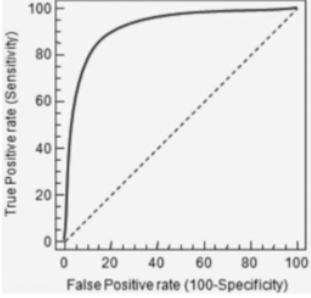

** 임계값(threshold) : 기준값 즉, 이것을 기준으로 이진 분류
- 클래스의 예측 확률이 나오는 모델에 사용 가능
- TPR(True Positive Rate)를 세로, FPR(False Positive Rate)를 가로

#### AUC(Area Under Curve) : ROC 커브 아래 넓이
- AUC가 넓을수록(= ROC 커브가 세로 축에 가까울 수록) 좋은 성능을 가짐

In [19]:
from sklearn import metrics

y = np.array([1,1,2,2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2) # roc_curve() : roc 커브 함수

In [22]:
roc_auc = metrics.auc(fpr,tpr)
roc_auc

0.75

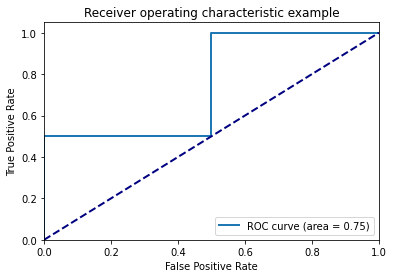

In [23]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()